# Práctica II
## Nombre: Incluye tu nombre y apellidos

Valor de la práctica en el curso 2 puntos. Calificación de la práctica sobre 10.

Usaremos los siguiente módulos y librerías y el path a las imágenes

In [1]:
%matplotlib inline 
import numpy as np
import scipy.fft

from skimage.io import imread, imsave   
from skimage.color import rgb2gray

from scipy import signal 

import matplotlib.pyplot as plt

# incluye aquí los módulos adicionales que necesites

import math
import cv2

In [2]:
IMPATH="./imagenes curso/"

In [3]:
def display_pair(imgs,titles):
    
    plt.figure(figsize=(20,20))
    plt.gray()
    
    plt.subplot(121)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.imshow(imgs[0])
    plt.title(titles[0], size=20)
    if len(imgs)> 1:
        plt.subplot(122)
        plt.imshow(imgs[1])
        plt.title(titles[1], size=20)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.show()

## Primer ejercicio (4 puntos)

La imagen del cameraman ha sido observada por una cámara que introduce patrones de barras verticales. 

255 0


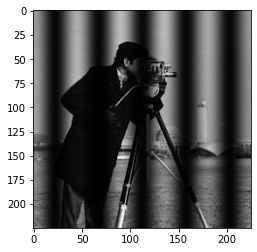

In [4]:
noisy_image = imread(IMPATH+'cameraman_field.png')
(dim_y,dim_x)=noisy_image.shape
print(noisy_image.max(),noisy_image.min())
_=plt.imshow(noisy_image,cmap='gray')

El modelo de observación es

    noisy_image=original_image*field
    
donde la imagen field es de la forma

    for x in range(dim_x):
        field[:,x]=(np.cos(2*np.pi*N*x/dim_y)+1.1)/2.1

donde dim_x es el número de columnas de la imagen original y N un número desconocido.

**1.1  (2 puntos)**

Estima N y reconstruye la imagen original

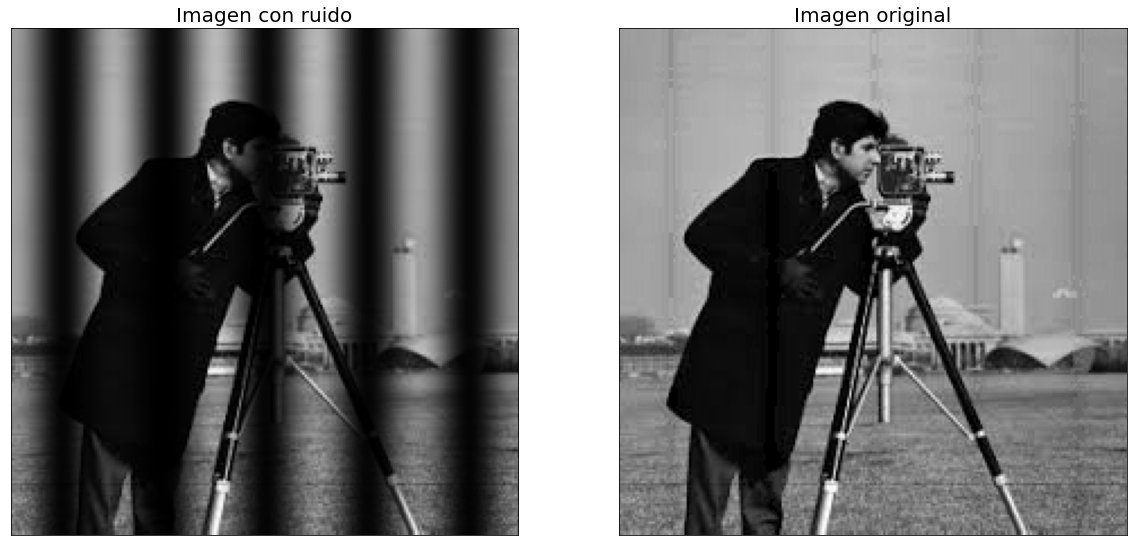

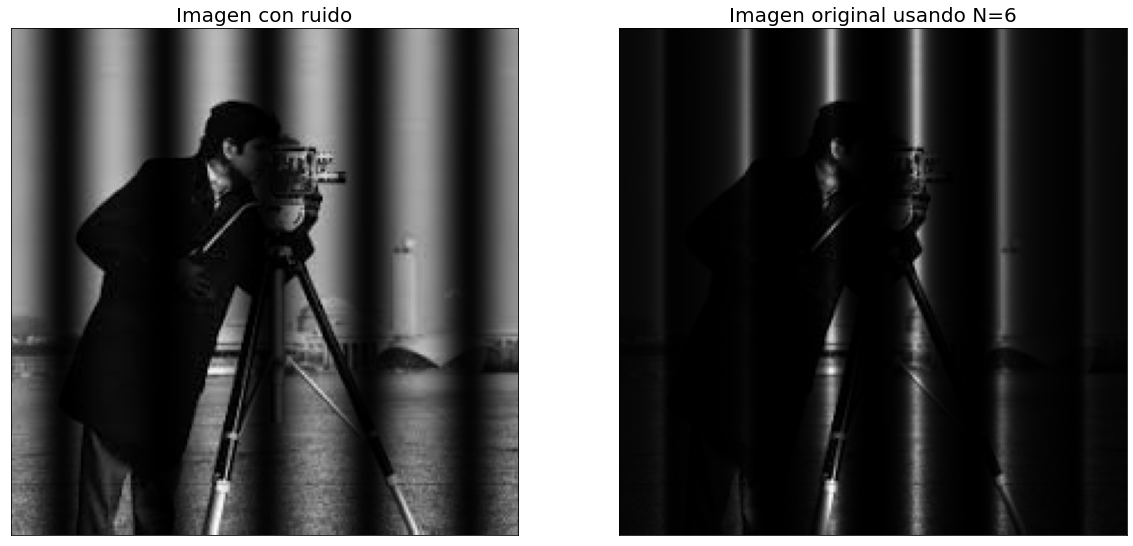

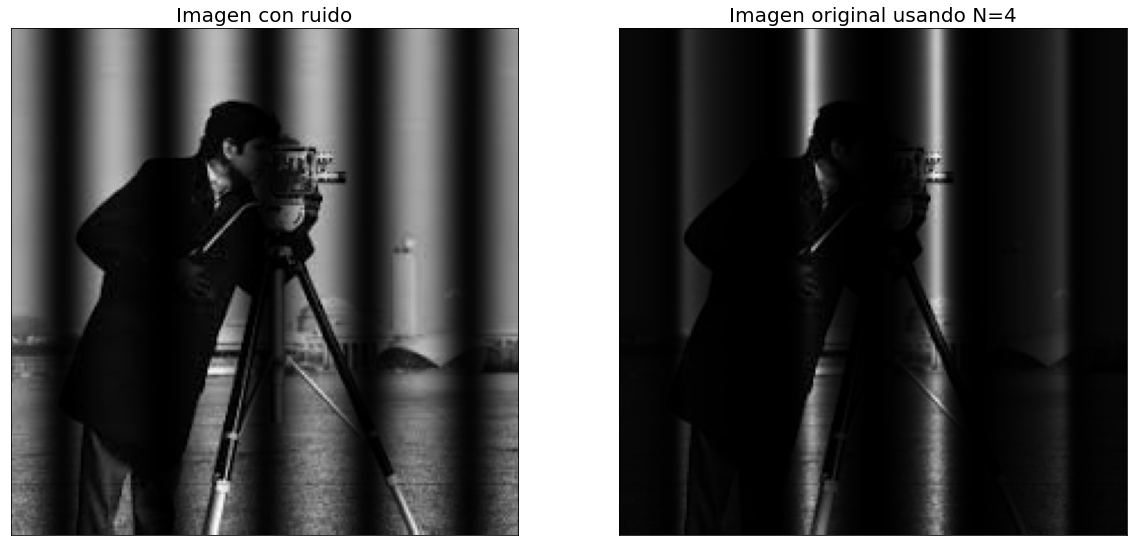

In [5]:
N=5 # Número de bandas de la imagen con ruido (oscilaciones de la función coseno)
field=np.zeros((1, noisy_image.shape[0]))

for x in range(dim_x): # Creo el campo tal y como se describe en el enunciado
    field[:,x]=((np.cos(2*np.pi*N*x/dim_y)+1.1)/2.1 + 0.0001) # Sumo 0.0001 para que no quede nunca un 0 en el denominador
    
original_image=noisy_image/field # Divido la imagen con ruido por el campo

title0="Imagen con ruido"
title1="Imagen original"
display_pair([noisy_image, original_image],[title0, title1])
imagen_res=original_image.copy() # Para el siguiente apartado

# Para demostrar qué sucede si N!=5
N=6
for x in range(dim_x): 
    field[:,x]=((np.cos(2*np.pi*N*x/dim_y)+1.1)/2.1 + 0.0001) 
original_image=noisy_image/field

title0="Imagen con ruido"
title1="Imagen original usando N=6" # Se observan 6 bandas
display_pair([noisy_image, original_image],[title0, title1])

N=4
for x in range(dim_x): 
    field[:,x]=((np.cos(2*np.pi*N*x/dim_y)+1.1)/2.1 + 0.0001) 
original_image=noisy_image/field

title0="Imagen con ruido"
title1="Imagen original usando N=4" # Se observan 4 bandas
display_pair([noisy_image, original_image],[title0, title1])

**1.2 (2 puntos)**

Si has hecho bien el ejercicio 1.2 habrás obtenido una estimación de la imagen original similar a la siguiente:

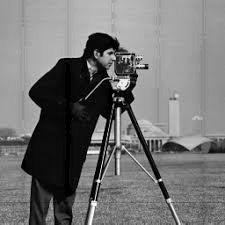

Implementa un método que elimine los artificios que todavía quedan en la imagen reconstruida

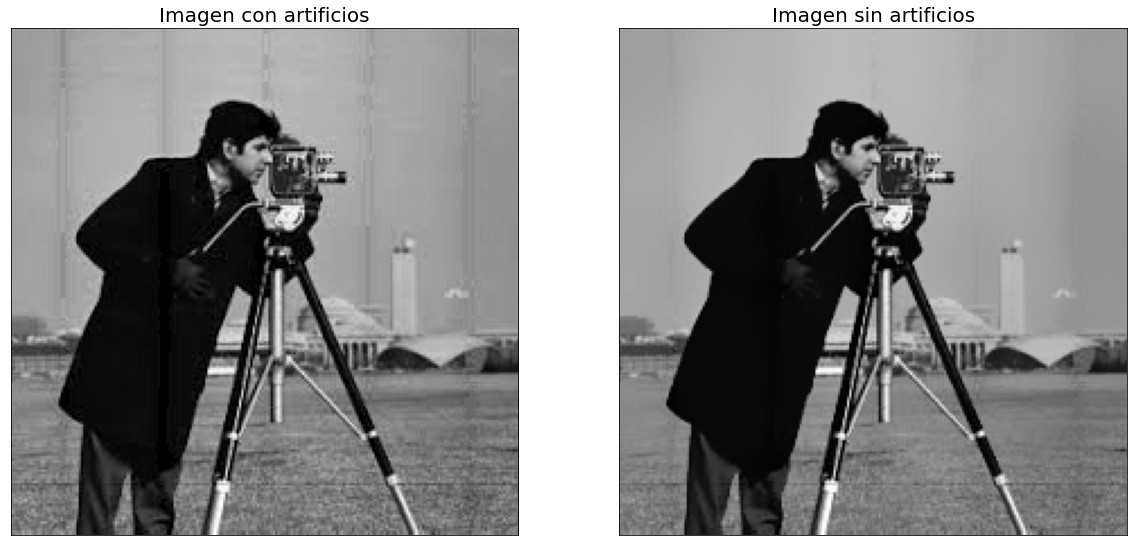

'\nReferencia: https://www.askpython.com/python/examples/denoising-images-in-python\n'

In [6]:
def eliminarArtificios(imagen_res, original_image):
    imagen_final=np.asarray(imagen_res, dtype=np.uint8)
    imagen_final=cv2.fastNlMeansDenoising(imagen_final, None, 15, 1, 21)
    title0="Imagen con artificios"
    title1="Imagen sin artificios"
    display_pair([imagen_res, imagen_final],[title0, title1])
    
eliminarArtificios(imagen_res, original_image)

"""
Referencia: https://www.askpython.com/python/examples/denoising-images-in-python
"""

## Segundo ejercicio (4 Puntos)

Elimina el ruido de la imagen siguiente

Máximo y Mínimo:
 255.0 0.0
Shape:  (474, 630)


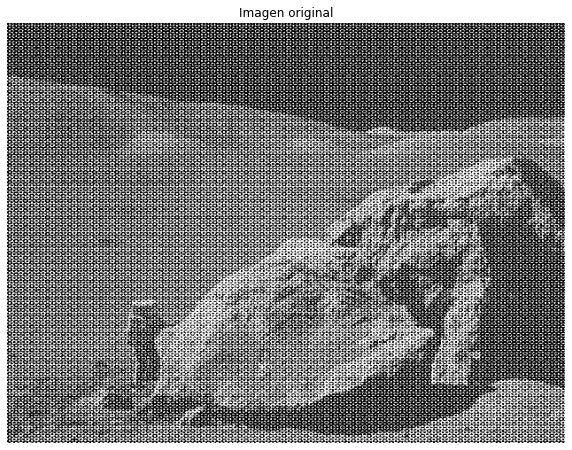

In [7]:
im = imread(IMPATH+'moonlanding.png').astype(float)
print("Máximo y Mínimo:\n", im.max(),im.min())
print("Shape: ",im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im, plt.cm.gray)
plt.axis('off') 
_=plt.title('Imagen original')

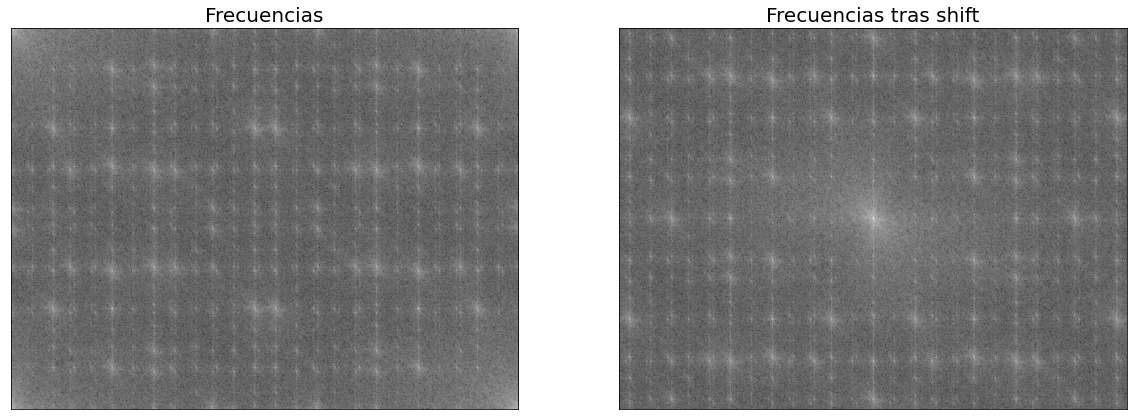

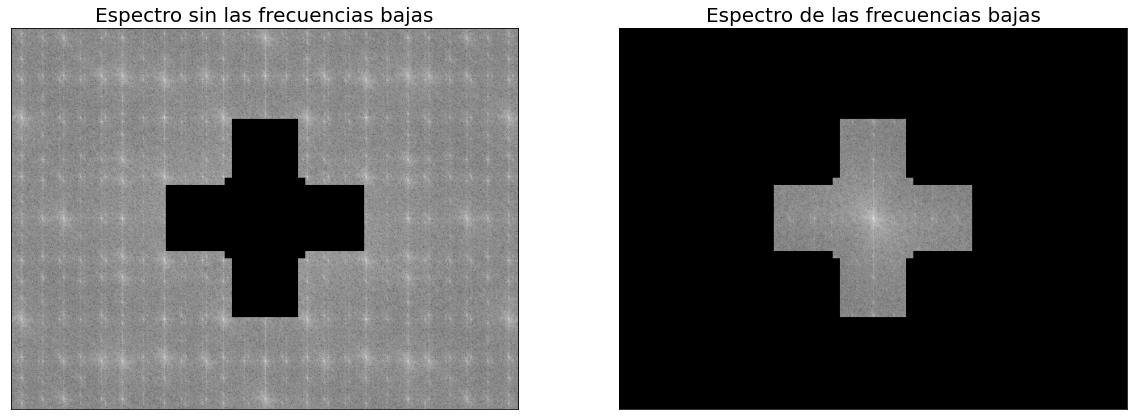

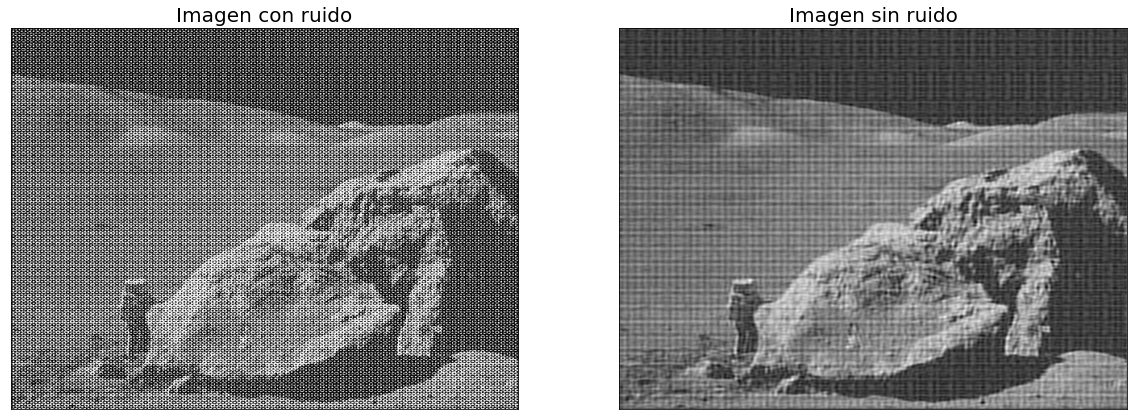

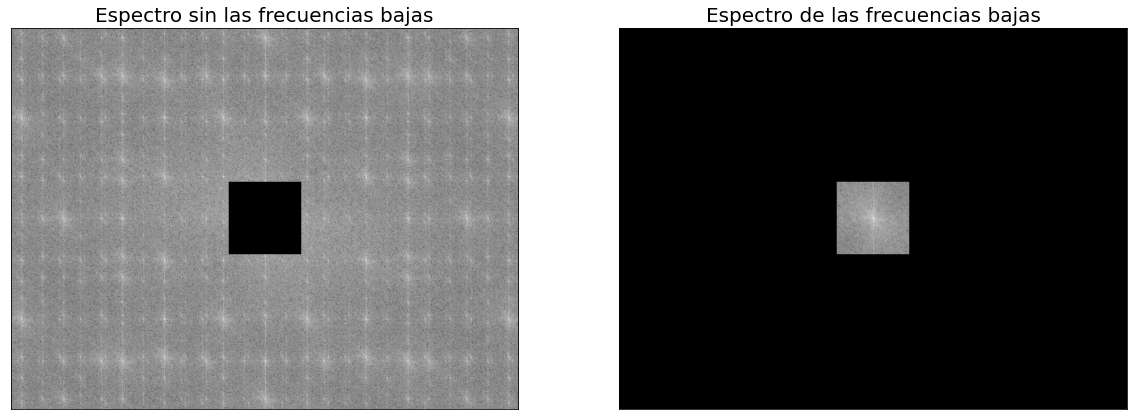

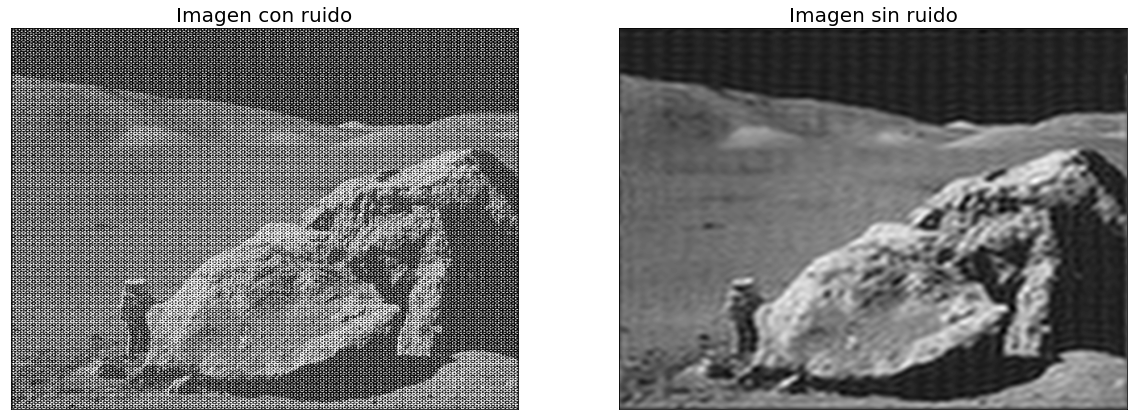

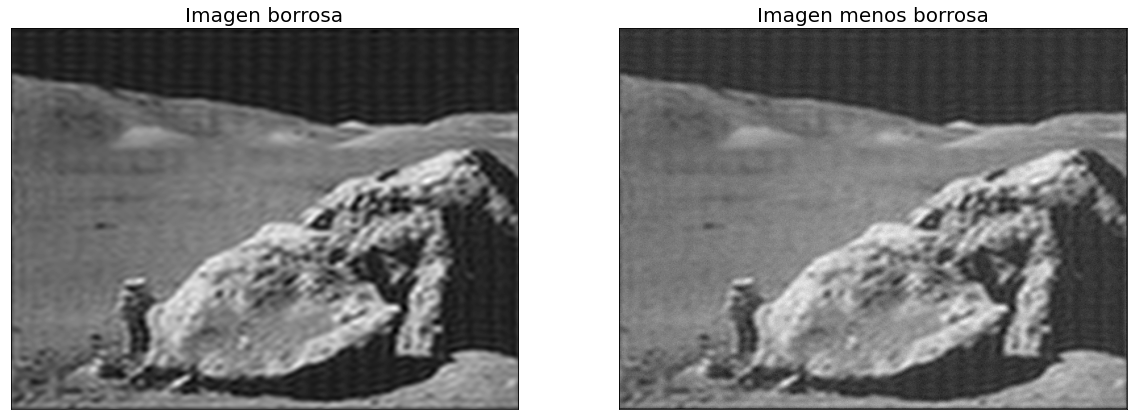

In [8]:
# Aplicamos filtro de paso bajo

# Cálculo de la transformada de fourier
fourier=scipy.fft.fft2(im)
espectro=scipy.fft.fftshift(fourier)

title0="Frecuencias"
title1="Frecuencias tras shift"
display_pair([(10*np.log10(1+np.abs(fourier))).astype(int), (10*np.log10(1+np.abs(espectro))).astype(int)],[title0, title1])

w,h=im.shape
half_w, half_h = int(w/2), int(h/2)

freq_baja=np.copy(espectro)
freq_baja2=np.copy(espectro)
espectro2=np.copy(espectro)

# Como se puede observar en la imagen de las frecuencias, interesa bloquear aquellas situadas
# en la cruz central que se forma (las esquinas antes de hacer shift).

# Bloque central
lx=50
ly=50
freq_baja[half_w-lx:half_w+lx,half_h-ly:half_h+ly]=0 # bloquea las frecuencias bajas

# Resto de la cruz
lx=41
ly=41
freq_baja[half_w-3*lx:half_w+lx,half_h-ly:half_h+ly]=0 # bloquea las frecuencias bajas
freq_baja[half_w-lx:half_w+3*lx,half_h-ly:half_h+ly]=0 # bloquea las frecuencias bajas
freq_baja[half_w-lx:half_w+lx,half_h-3*ly:half_h+ly]=0 # bloquea las frecuencias bajas
freq_baja[half_w-lx:half_w+lx,half_h-ly:half_h+3*ly]=0 # bloquea las frecuencias bajas

espectro-=freq_baja # nos quedamos con el bloque central de frecuencias bajas

title0="Espectro sin las frecuencias bajas"
title1="Espectro de las frecuencias bajas"
display_pair([(10*np.log10(1+np.abs(freq_baja))).astype(int), (10*np.log10(1+np.abs(espectro))).astype(int)],[title0, title1])

imagen_final=scipy.fft.ifft2(scipy.fft.ifftshift(espectro)).real

# Resultado retirando la cruz central
title0="Imagen con ruido"
title1="Imagen sin ruido"
display_pair([im, imagen_final],[title0, title1])

# Sin embargo, el resultado obtenido retirando únicamente el bloque central es visualmente mejor,
# ya que tiene menos ruido, aunque es claramente más borroso. Aun así, la roca se ve de forma nítida en el primer
# caso, cosa que en el segundo no sucede. Muestro ambos resultados.

# Bloque central
lx=45
ly=45
freq_baja2[half_w-lx:half_w+lx,half_h-ly:half_h+ly]=0 # bloquea las frecuencias bajas

espectro2-=freq_baja2 # nos quedamos con el bloque central de frecuencias bajas

title0="Espectro sin las frecuencias bajas"
title1="Espectro de las frecuencias bajas"
display_pair([(10*np.log10(1+np.abs(freq_baja2))).astype(int), (10*np.log10(1+np.abs(espectro2))).astype(int)],[title0, title1])

imagen_final=scipy.fft.ifft2(scipy.fft.ifftshift(espectro2)).real

# Resultado retirando el bloque central
title0="Imagen con ruido"
title1="Imagen sin ruido"
display_pair([im, imagen_final],[title0, title1])

# Se puede intentar retirar el emborronamiento del resultado del segundo caso con un filtro de Wiener

n=3
kernel=np.ones((n, n))/n**2
im_res=signal.convolve2d(imagen_final, kernel, 'same')
im_res+=0.1*imagen_final.std()*np.random.standard_normal(im_res.shape)

# Resultado retirando el emborronamiento
title0="Imagen borrosa"
title1="Imagen menos borrosa"
display_pair([imagen_final, im_res],[title0, title1])

# Es cierto que la imagen es ligeramente más nítida (sobre todo en el centro), aunque más clara, pero no es perfecta.

## Tercer ejercicio (2 puntos)

El tercer ejercicio está dedicado al filtro de Wiener. 

Recuerda que este filtro utilizaba el modelo espacial

\begin{equation*}
g(x,y)=h(x,y)*f(x,y)+\mbox{ruido}(x,y)
\end{equation*}

donde no conocíamos el ruido, sólo la imagen observada $g(x,y)$ y el emborronamiento $h(x,y)$.

Vimos en teoría que el filtro de Wiener, en su versión simplificada, estima la transformada de Fourier de la imagen original utilizando
\begin{equation*}
\hat F(u,v)=\frac{H^*(u,v)}{\alpha+ H(u,v)H^*(u,v)}G(u,v)
\end{equation*}

Si ahora llamamos $\beta=\frac{1}{1+\alpha}$ tenemos

\begin{equation*}
\hat F(u,v)=\frac{\beta H^*(u,v)}{(1-\beta)\times 1+ \beta H(u,v)H^*(u,v)}G(u,v)
\end{equation*}

donde $\hat F(u,v)$ es la estimación de la transformada de Fourier de la imagen original que produce el filtro de Wiener simplificado y $\beta\in (0,1)$.

Vamos a comenzar generando nuestra imagen borrosa y ruidosa

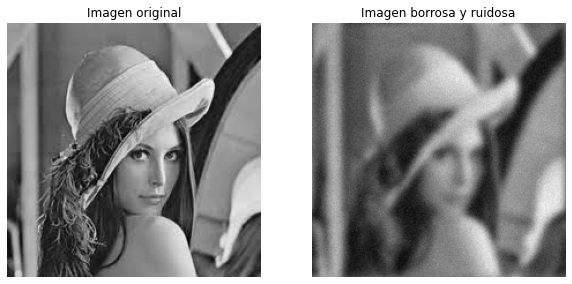

In [9]:
im = rgb2gray(imread(IMPATH+'lena.jpg'))
dim=im.shape

# nuestra función de emborronamiento
kernel = np.outer(signal.gaussian(dim[0], 3),signal.gaussian(dim[1], 3))
kernel=kernel/kernel.sum()

# Fourier de la imagen original y del emborronamiento
im_fft = np.fft.fft2(im)
kernel_fft = np.fft.fft2(np.fft.ifftshift(kernel)) 

# Introducción de ruido
prop=0.1
np.random.seed(0)
noise=prop* im.std() * np.random.standard_normal(dim)


im_blur_noise_fft = im_fft*kernel_fft +np.fft.fft2(noise)
im_blur_noise = np.fft.ifft2(im_blur_noise_fft).real

plt.figure(figsize=(10,10))
plt.gray()
plt.subplot(121), plt.imshow(im), plt.title('Imagen original'), plt.axis('off')
plt.subplot(122), plt.imshow(im_blur_noise)
_=plt.title('Imagen borrosa y ruidosa'), plt.axis('off')

Veamos un ejemplo de reconstrucción de la imagen original

Norma de la diferencia de las imágenes 18.922856242776188


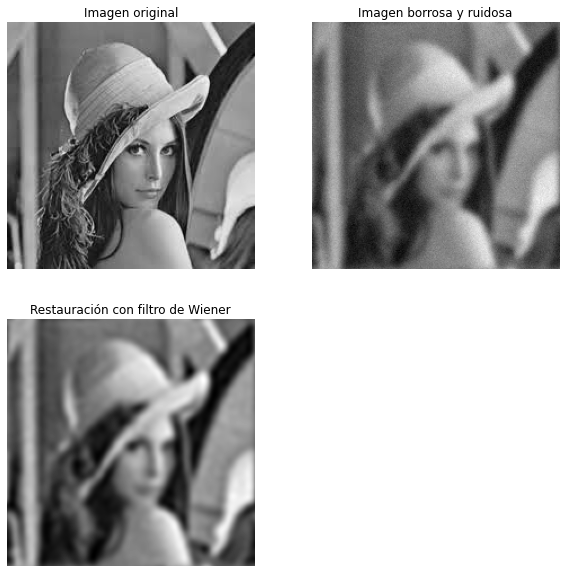

In [10]:
beta=0.90
# calculamos la TF de la imagen borrosa
# y el inverso de la TF del filtro
im_blur_noise_fft = np.fft.fft2(im_blur_noise)
wiener_kernel_fft = beta*kernel_fft.conj()/ ((1-beta)*1 + beta*kernel_fft*kernel_fft.conj()) 

# Los multiplicamos y calculamos la TF inversa
im_restored_fft =wiener_kernel_fft* im_blur_noise_fft
im_restored = np.fft.ifft2(im_restored_fft).real

plt.figure(figsize=(10,10))
plt.gray()
plt.subplot(221), plt.imshow(im), plt.title('Imagen original'), plt.axis('off')
plt.subplot(222), plt.imshow(im_blur_noise), plt.title('Imagen borrosa y ruidosa'), plt.axis('off')
plt.subplot(223), plt.imshow(im_restored), plt.title('Restauración con filtro de Wiener')
_=plt.axis('off')

print("Norma de la diferencia de las imágenes",\
      np.linalg.norm(im_restored - im))


El filtro de Wiener tal y como lo hemos visto penaliza a todas las frecuencias por igual. Observa el término $(1-\beta)*1$ en el denominador.

En este ejercicio deberás penalizar más las frecuencias más altas reemplazando el $*1$ en la expresión anterior por 

    *np.fft.fft2(c)*np.fft.fft2(c).conj()

donde c es el filtro paso alto definido por

c(0,0)=1

c(-1,0)=c(1,0)=c(0,1)=c(0,-1)=-1/4

Varía $\beta$ en linspace(0.1, 0.9,9) y para cada uno de los valores de $\beta$ muestra la imagen original, la borrosa y ruidosa y la restauración. ¿Cuál de las restauraciones está más próxima a la imagen original en SNR?

In [11]:
# Función para calcular la SNR

def signaltonoise(original,reconstruction):
    original = original.astype(float)
    reconstruction=reconstruction.astype(float)    
    
    var=original.var()
    dif=np.mean((original-reconstruction)**2)
     
    return np.where(dif == 0, math.nan, 10*np.log10(var/dif))

beta =  0.1  / SNR =  9.255287005494772
beta =  0.2  / SNR =  9.619386304938404
beta =  0.30000000000000004  / SNR =  9.828110678177499
beta =  0.4  / SNR =  9.97153374944814
beta =  0.5  / SNR =  10.076065096036618
beta =  0.6  / SNR =  10.149259270675579
beta =  0.7000000000000001  / SNR =  10.184757846724883
beta =  0.8  / SNR =  10.146291206528824
beta =  0.9  / SNR =  9.847694088477844


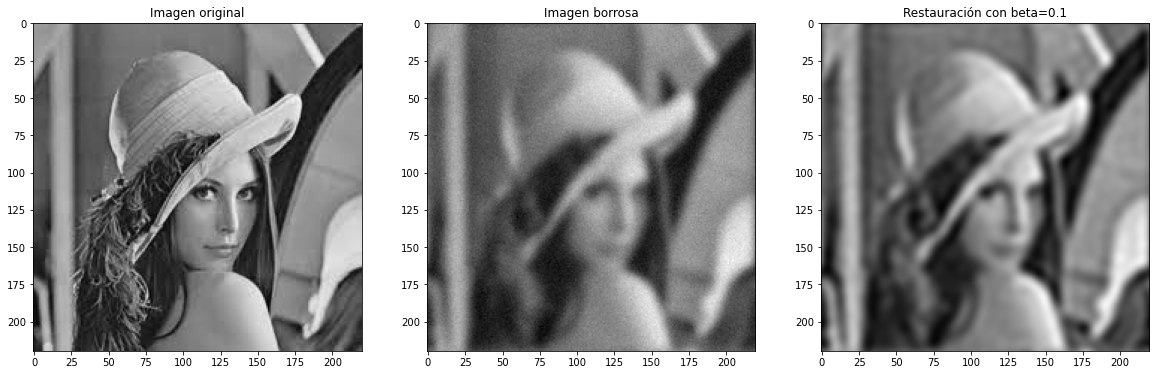

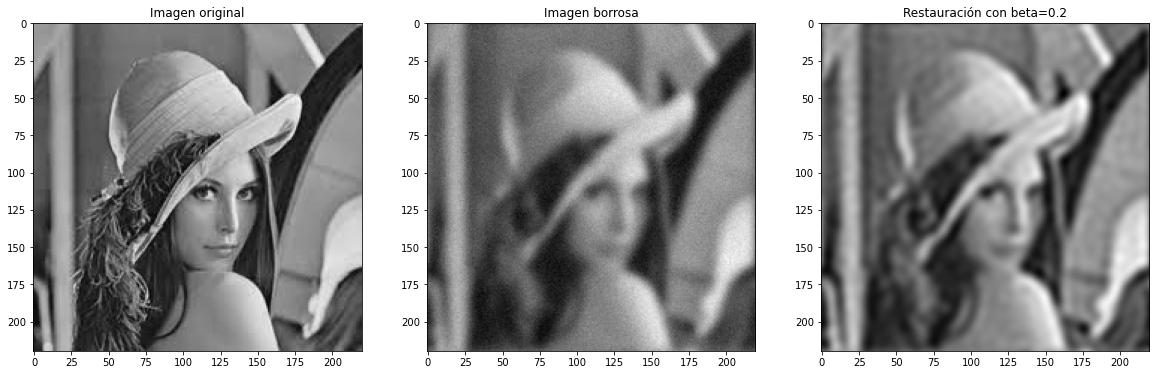

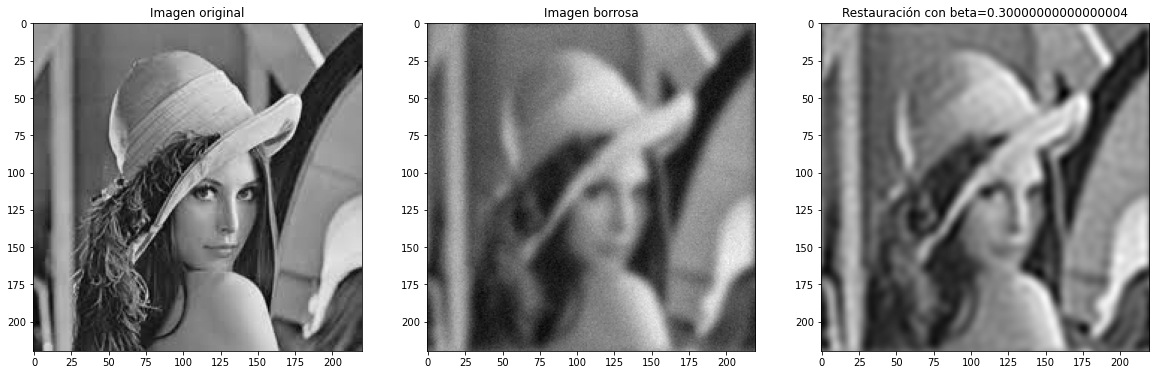

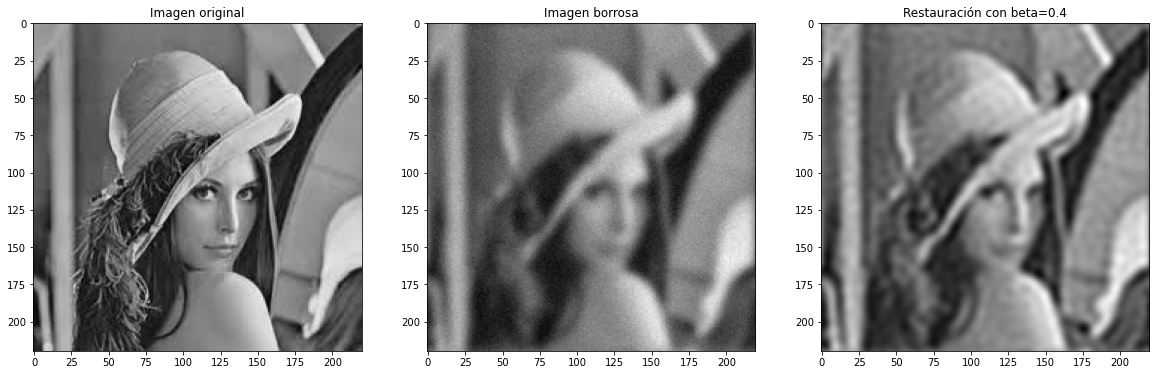

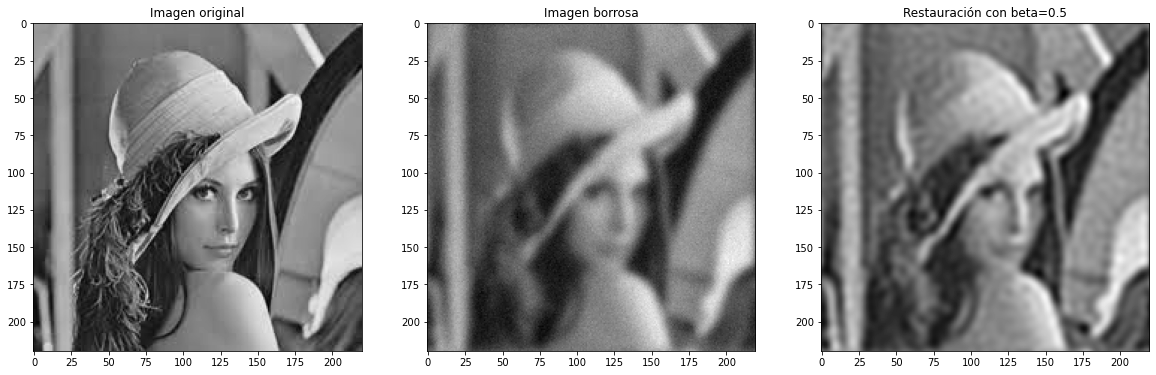

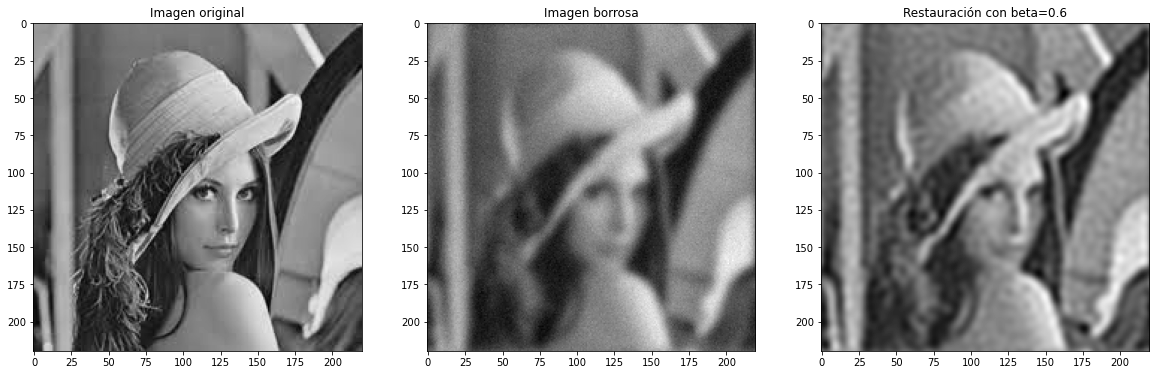

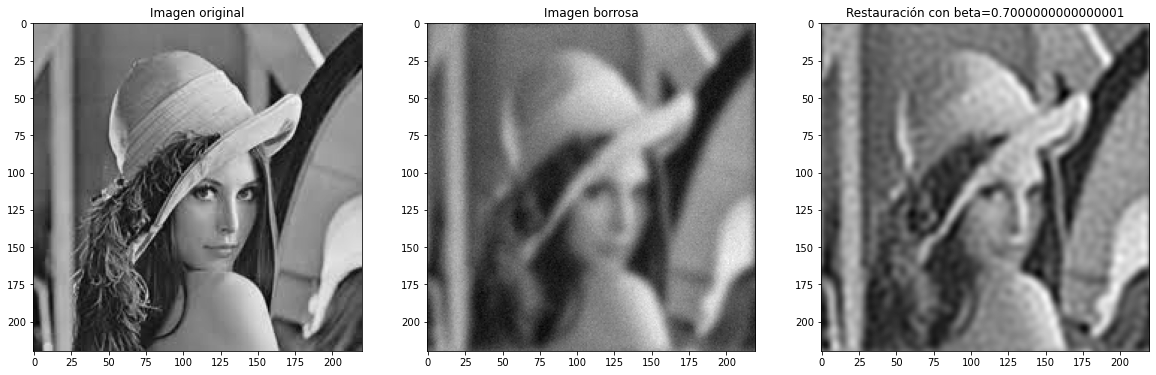

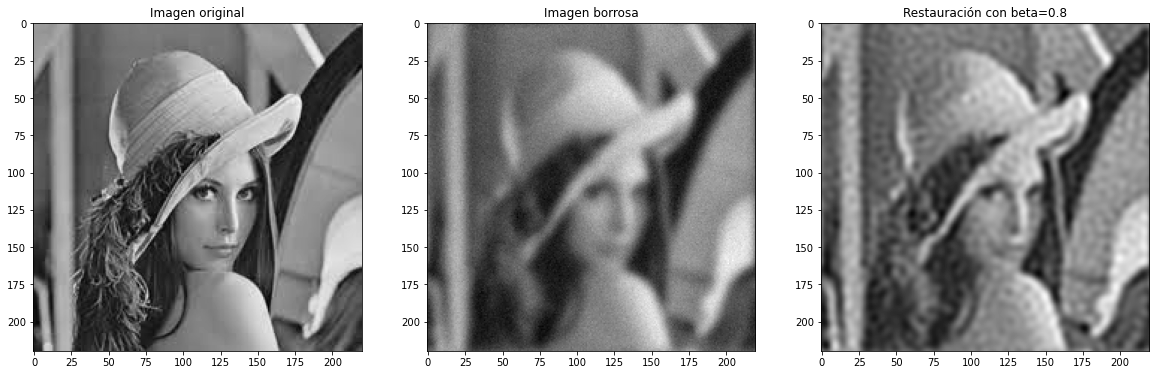

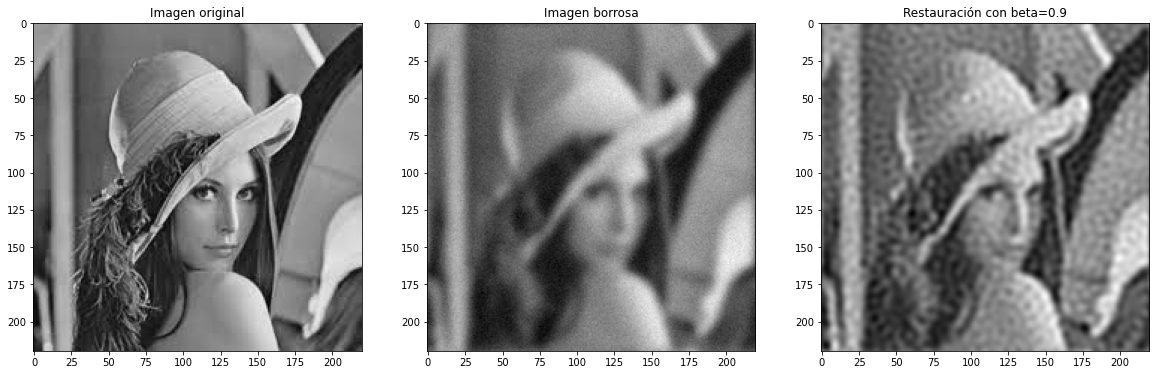

In [13]:
(w, h)=fourier.shape
half_w, half_h=int(w/2), int(h/2)

c=np.zeros_like(kernel)
c[0,0]=1
c[-1,0]=c[1,0]=c[0,1]=c[0,-1]=-1/4

for beta in np.linspace(0.1, 0.9, 9):
    wiener_kernel_fft=beta*kernel_fft.conj()/((1-beta)*np.fft.fft2(c)*np.fft.fft2(c).conj()+beta*kernel_fft*kernel_fft.conj())
    
    # Los multiplicamos y calculamos la TF inversa
    im_restored_fft=wiener_kernel_fft*im_blur_noise_fft
    im_restored=np.fft.ifft2(im_restored_fft).real
    
    # SNR
    snr=signaltonoise(im, im_restored)
    print('beta = ', beta, ' / SNR = ', snr)
    
    plt.figure(figsize=(20,20))
    plt.gray()
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.title('Imagen original')
    plt.subplot(1,3,2)
    plt.imshow(im_blur_noise)
    plt.title('Imagen borrosa')
    plt.subplot(1,3,3)
    plt.imshow(im_restored)
    plt.title('Restauración con beta='+str(beta))

La restauración más próxima a la imagen original es la que se obtiene para beta=0.7, ya que es la que mayor SNR consigue, por lo que el error es menor.

¿Cómo justificarías la utilización de este filtro paso alto?

Utilizando el filtro de paso alto se penalizan las frecuencias más altas, que son las que se corresponden con el ruido